#Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of analyzing and summarizing data sets to understand their main characteristics, often using visual methods. It helps data scientists detect patterns, spot anomalies, test hypotheses, and check assumptions. EDA is essential for selecting the right models and ensuring the data is ready for analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Generate sample data
n_samples = 1000

In [ ]:
# Age
age = np.random.randint(18, 70, n_samples)

In [ ]:
# Annual Income (in lakhs, log-normally distributed)
annual_income = np.exp(np.random.normal(loc=3, scale=0.5, size=n_samples))

In [ ]:
# City in India
cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune', 'Ahmedabad']
city = np.random.choice(cities, n_samples)

In [ ]:
# Number of children
num_children = np.random.randint(0, 5, n_samples)

In [ ]:
# Prior defaults (binary)
prior_defaults = np.random.choice([0, 1], n_samples, p=[0.8, 0.2])

In [ ]:
# Late fees (skewed distribution)
late_fees = np.random.exponential(scale=1000, size=n_samples)


In [ ]:
# Credit score (normal distribution)
credit_score = np.clip(np.random.normal(loc=700, scale=100, size=n_samples), 300, 900).astype(int)

In [ ]:
# Loan amount (in lakhs, correlated with annual income)
loan_amount = annual_income * np.random.uniform(0.5, 2, n_samples)

In [ ]:
# Debt to income ratio
debt_to_income = np.clip(np.random.normal(loc=0.3, scale=0.1, size=n_samples), 0, 1)

In [ ]:
# Loan status (binary, influenced by other features)
loan_status = np.where(
    (credit_score > 700) & (debt_to_income < 0.4) & (prior_defaults == 0),
    np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    np.random.choice([0, 1], n_samples, p=[0.6, 0.4])
)

In [ ]:
# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'AnnualIncome': annual_income,
    'City': city,
    'NumChildren': num_children,
    'PriorDefaults': prior_defaults,
    'LateFees': late_fees,
    'CreditScore': credit_score,
    'LoanAmount': loan_amount,
    'DebtToIncomeRatio': debt_to_income,
    'LoanStatus': loan_status
})

In [ ]:
# Display first few rows and basic information
print(df.head())
print(df.info())

   Age  AnnualIncome     City  NumChildren  PriorDefaults     LateFees  \
0   56      8.995971  Kolkata            4              0   378.686041   
1   69     22.236427    Delhi            2              0   142.958459   
2   46     13.760809  Chennai            2              0  1000.749705   
3   32      9.863816     Pune            2              0   137.339620   
4   60     14.537239  Kolkata            4              0   863.917728   

   CreditScore  LoanAmount  DebtToIncomeRatio  LoanStatus  
0          716   12.083543           0.284135           0  
1          741   29.553454           0.321758           0  
2          755    9.248818           0.225015           0  
3          682    6.798206           0.207301           0  
4          608   18.815554           0.333489           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -

In [ ]:
# Basic statistics
print(df.describe())

              Age  AnnualIncome  NumChildren  PriorDefaults     LateFees  \
count  1000.00000   1000.000000  1000.000000      1000.0000  1000.000000   
mean     43.81900     23.349776     1.995000         0.2000   963.477234   
std      14.99103     12.124475     1.418092         0.4002   948.650757   
min      18.00000      4.720300     0.000000         0.0000     0.227064   
25%      31.00000     14.791938     1.000000         0.0000   275.039611   
50%      44.00000     20.633545     2.000000         0.0000   665.345352   
75%      56.00000     28.296551     3.000000         0.0000  1350.500698   
max      69.00000     74.902782     4.000000         1.0000  6096.553549   

       CreditScore   LoanAmount  DebtToIncomeRatio   LoanStatus  
count  1000.000000  1000.000000        1000.000000  1000.000000  
mean    696.230000    28.818580           0.296003     0.288000  
std      97.101925    18.754455           0.103329     0.453058  
min     372.000000     3.144610           0.000000 

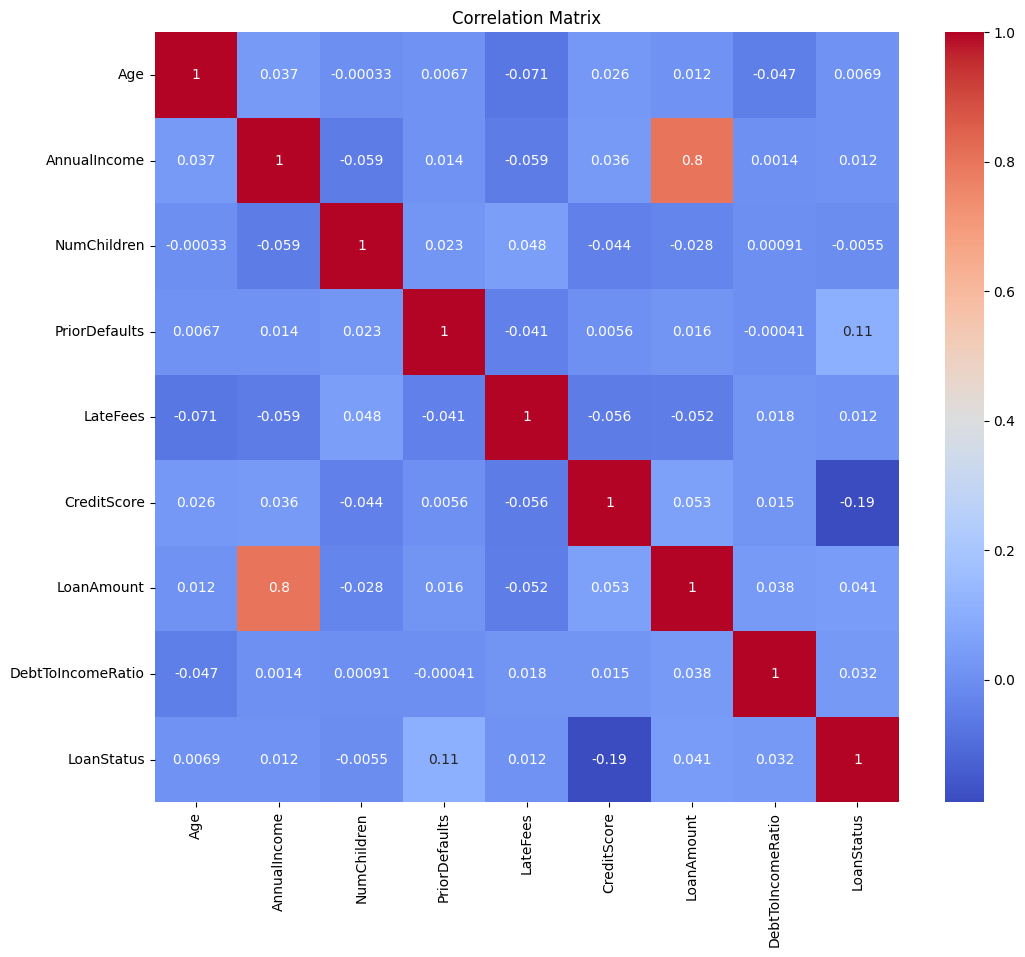

In [ ]:
# Correlation matrix (only for numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

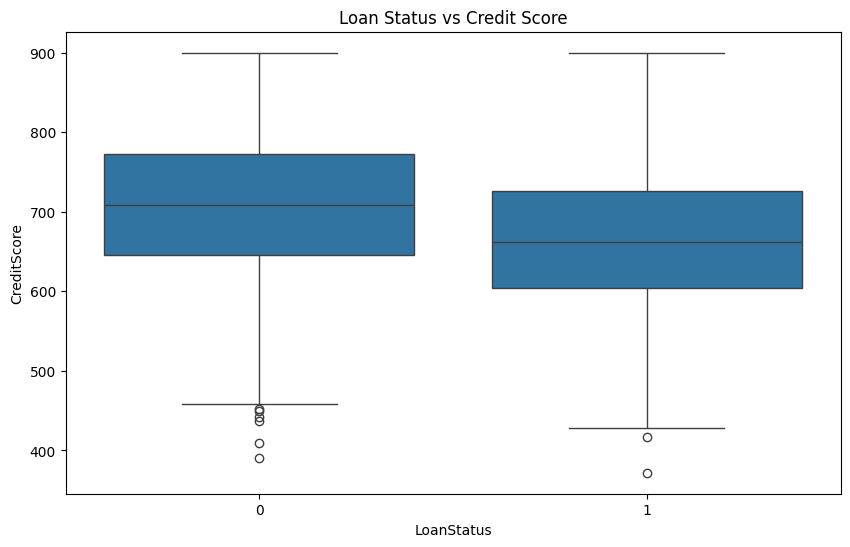

In [ ]:
# Bivariate analysis: LoanStatus vs CreditScore
plt.figure(figsize=(10, 6))
sns.boxplot(x='LoanStatus', y='CreditScore', data=df)
plt.title('Loan Status vs Credit Score')
plt.show()

In [ ]:
# Log transformation of AnnualIncome
df['LogAnnualIncome'] = np.log(df['AnnualIncome'])

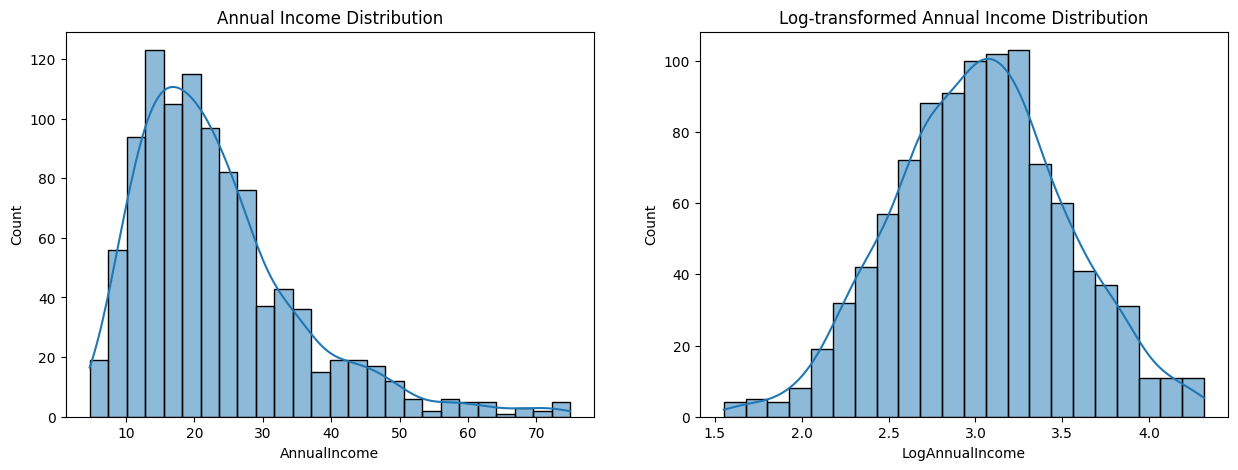

In [ ]:
# Compare distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['AnnualIncome'], kde=True, ax=ax1)
ax1.set_title('Annual Income Distribution')
sns.histplot(df['LogAnnualIncome'], kde=True, ax=ax2)
ax2.set_title('Log-transformed Annual Income Distribution')
plt.show()

In [ ]:
# Binning Age
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

In [ ]:
# One-hot encoding for City
try:
    # For newer versions of scikit-learn
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    # For older versions of scikit-learn
    encoder = OneHotEncoder()

city_encoded = encoder.fit_transform(df[['City']])
if isinstance(city_encoded, np.ndarray):
    city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))
else:
    city_encoded_df = pd.DataFrame(city_encoded.toarray(), columns=encoder.get_feature_names_out(['City']))

df = pd.concat([df, city_encoded_df], axis=1)

<ipython-input-23-c1f23031653b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_approval_by_age = df.groupby('AgeBin')['LoanStatus'].mean().sort_values(ascending=False)


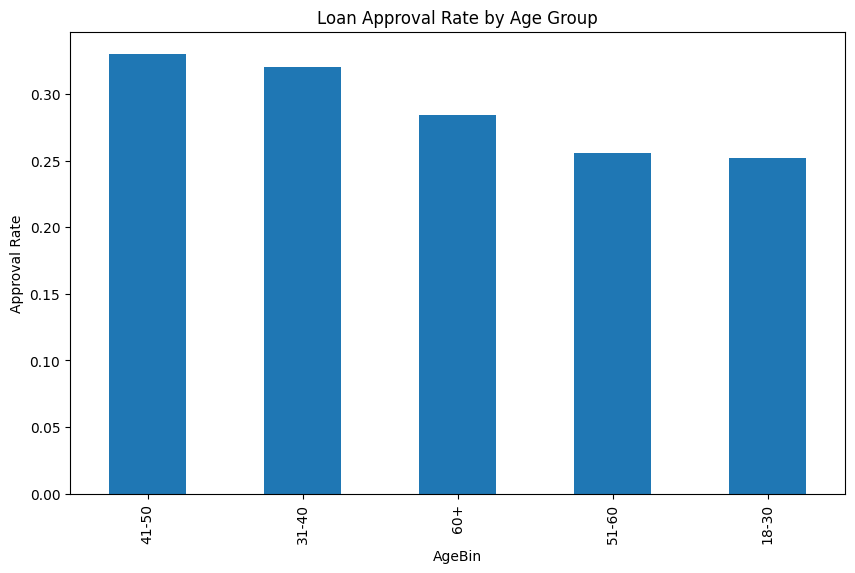

In [ ]:
# Analyze loan approval rate by age group
loan_approval_by_age = df.groupby('AgeBin')['LoanStatus'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
loan_approval_by_age.plot(kind='bar')
plt.title('Loan Approval Rate by Age Group')
plt.ylabel('Approval Rate')
plt.show()

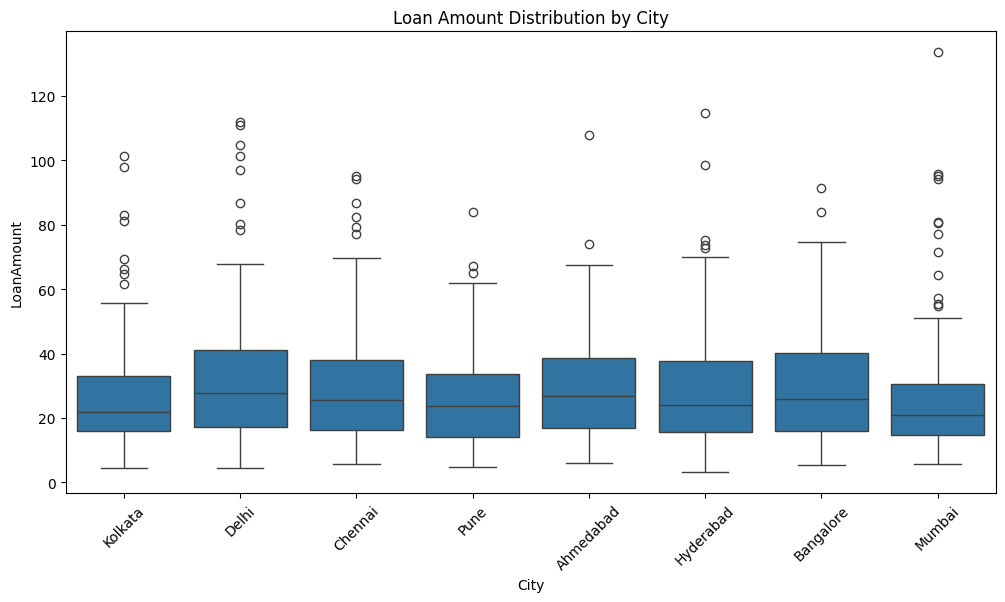

In [ ]:
# Analyze loan amount distribution by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by City')
plt.xticks(rotation=45)
plt.show()

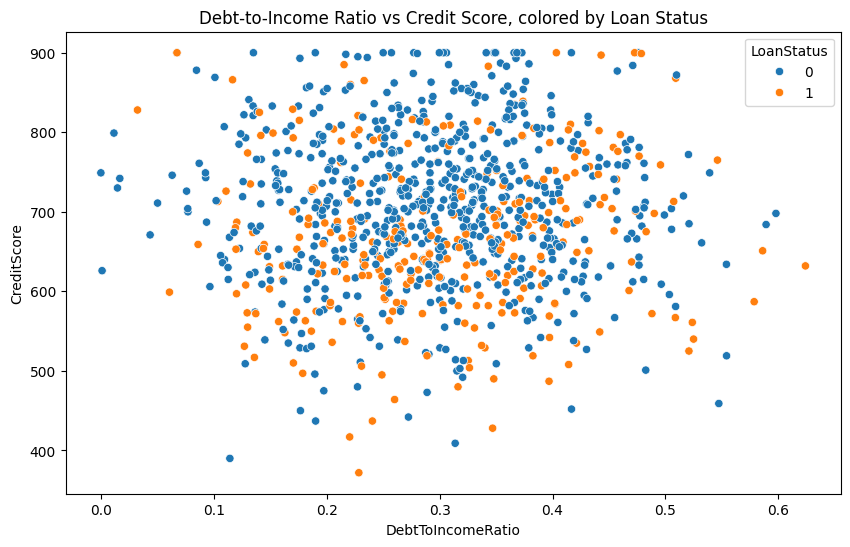

In [ ]:
# Relationship between Debt-to-Income Ratio and Loan Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DebtToIncomeRatio', y='CreditScore', hue='LoanStatus', data=df)
plt.title('Debt-to-Income Ratio vs Credit Score, colored by Loan Status')
plt.show()

In [ ]:
print("EDA completed. You can further analyze the data based on specific questions or hypotheses.")

EDA completed. You can further analyze the data based on specific questions or hypotheses.
